In [2]:
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import sigpy as sp
import sigpy.plot as pl
from warnings import warn
# import epgtorch as epg
%matplotlib notebook

In [3]:
import epgtorch_gpu as epg

In [4]:
T1_mapping = np.load("DictionaryAndSequenceInfo/T1_mapping.npy")/1000
T2_mapping = np.load("DictionaryAndSequenceInfo/T2_mapping.npy")/1000
pd_mapping = np.load("DictionaryAndSequenceInfo/pd_mapping.npy")

<IPython.core.display.Javascript object>


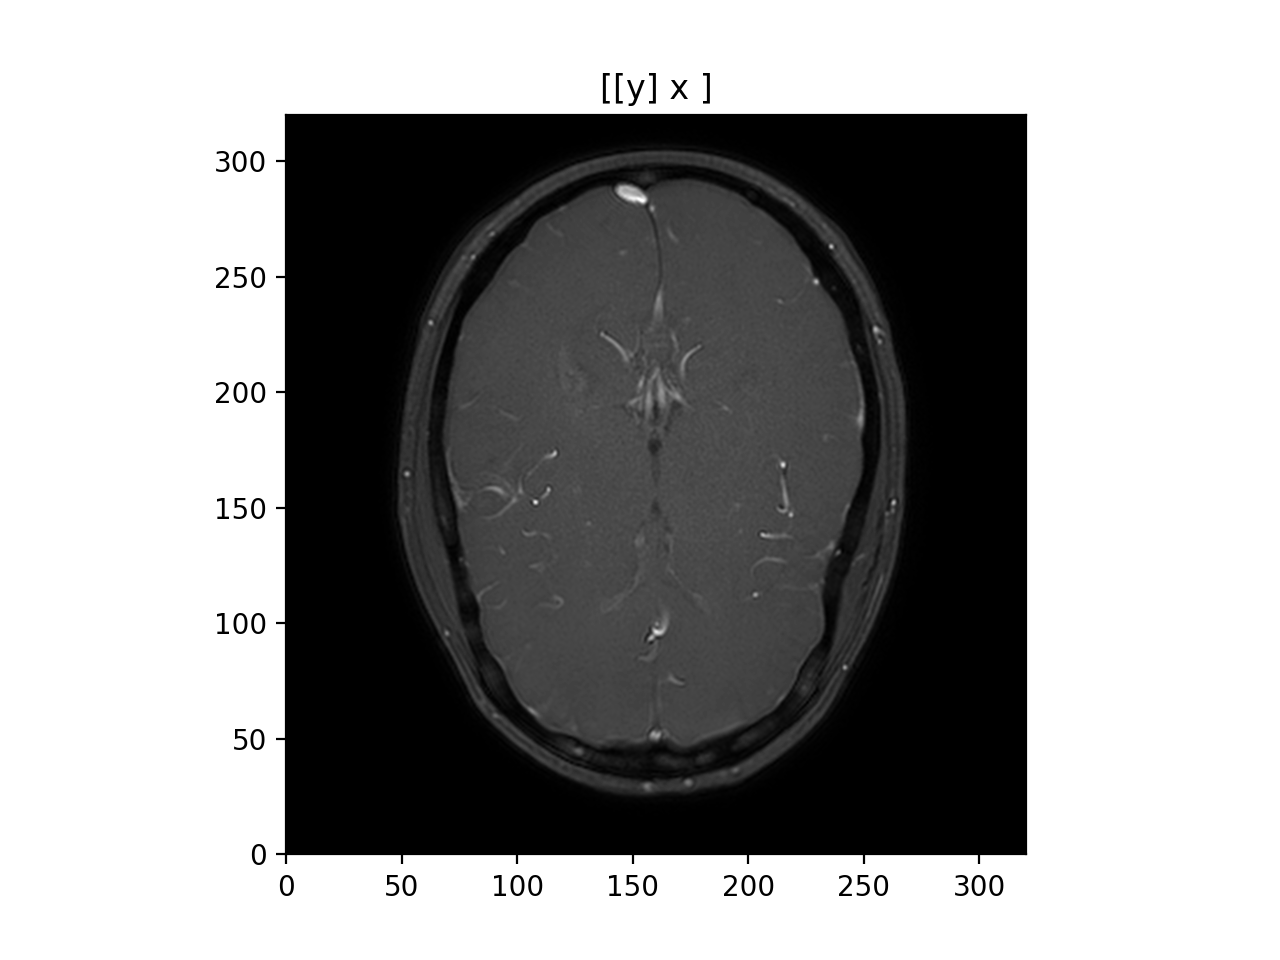

In [5]:
pl.ImagePlot(pd_mapping)

In [20]:
TE = 110e-3
TR = 2226e-3

angle_ex = 90
# angles = torch.tensor([69.]).cuda()
angles = torch.tensor([120.])

ETL = 1

# angle_ex_rad = torch.tensor(np.pi/180. * angle_ex).cuda()
# angles_rad = torch.tensor(np.pi/180. * angles).cuda()

angle_ex_rad = torch.tensor(np.pi/180. * angle_ex)
angles_rad = torch.tensor(np.pi/180. * angles)

/home/kewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [6]:
TE = 15e-3
TR = 450e-3

angle_ex = 90
# angles = torch.tensor([69.]).cuda()
angles = torch.tensor([69.])

ETL = 1

# angle_ex_rad = torch.tensor(np.pi/180. * angle_ex).cuda()
# angles_rad = torch.tensor(np.pi/180. * angles).cuda()

angle_ex_rad = torch.tensor(np.pi/180. * angle_ex)
angles_rad = torch.tensor(np.pi/180. * angles)

/home/kewang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [9]:
im = np.concatenate((T1_mapping[None,None,:,:],T2_mapping[None,None,:,:],pd_mapping[None,None,:,:]),1)

In [49]:
imm = torch.tensor(np.concatenate((im,im,im,im),0)).cuda()

In [22]:
T1w_fp_ep1 = epg.SE_sim(angle_ex_rad, angles_rad, TE,imm, TR, B1=1.)

torch.Size([1, 1, 320, 320])
torch.Size([2, 1, 320, 320])
torch.Size([3, 1, 320, 320])
torch.Size([4, 1, 320, 320])


In [50]:
msk = imm[:,2,:,:]<50

In [51]:
m1 = imm*msk.unsqueeze(1).type(torch.double)

<IPython.core.display.Javascript object>


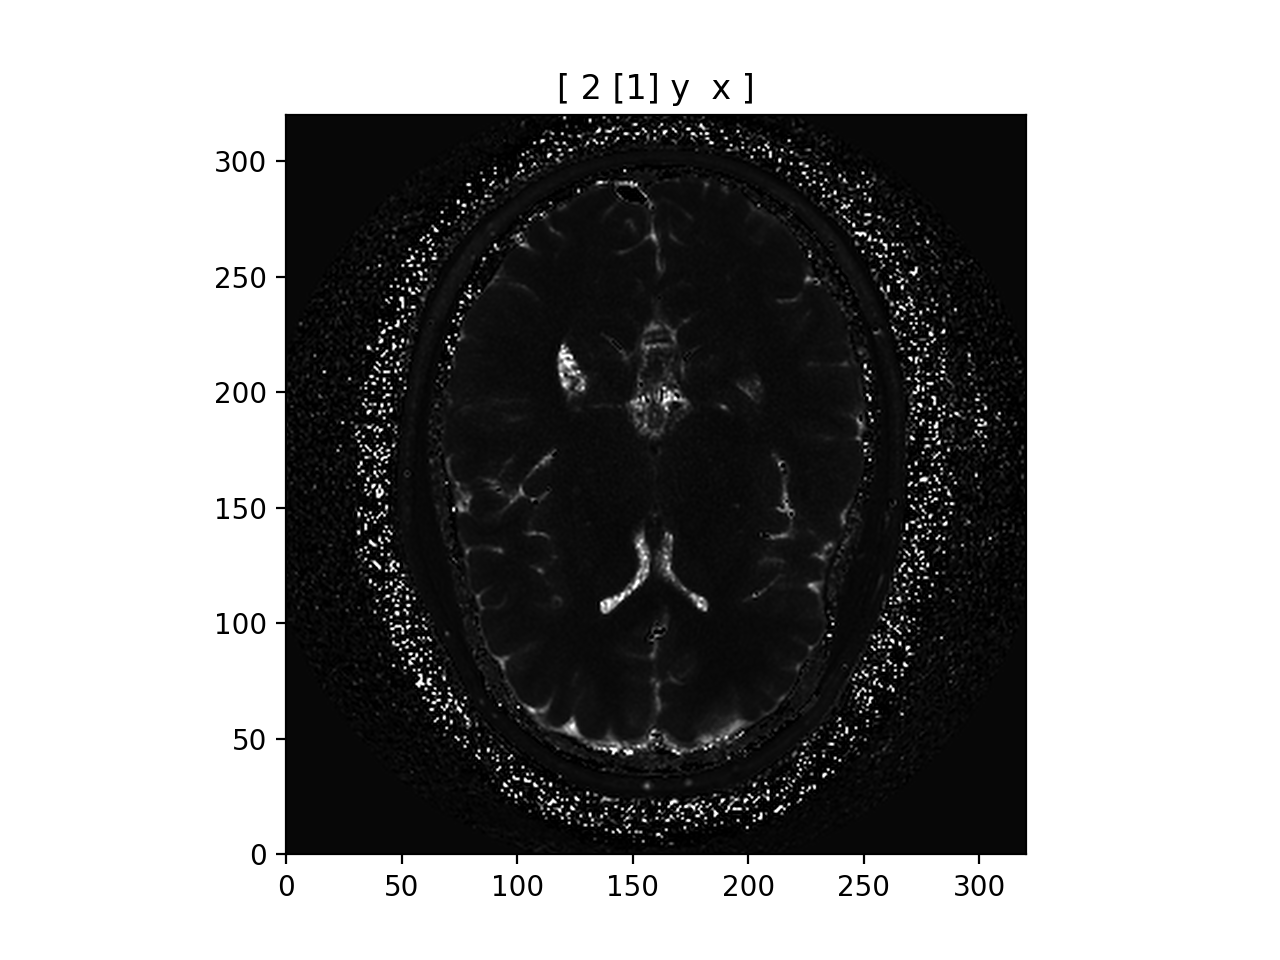

In [52]:
pl.ImagePlot(m1.cpu().numpy())

In [40]:
msk.shape

torch.Size([4, 320, 320])

<IPython.core.display.Javascript object>


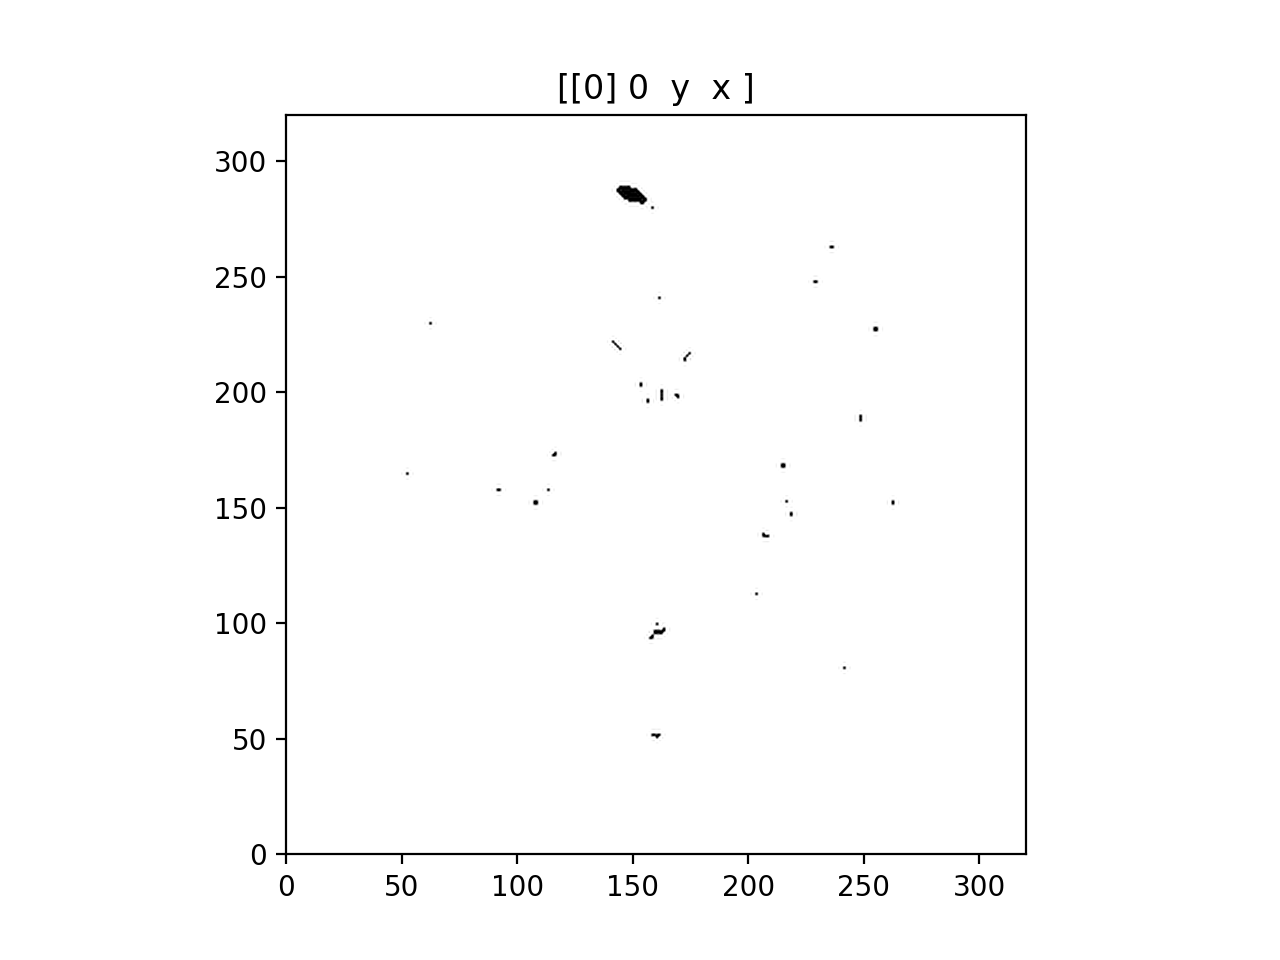

In [42]:
pl.ImagePlot(msk.unsqueeze(1).cpu().numpy())

In [28]:
imm.shape

torch.Size([4, 3, 320, 320])

<IPython.core.display.Javascript object>


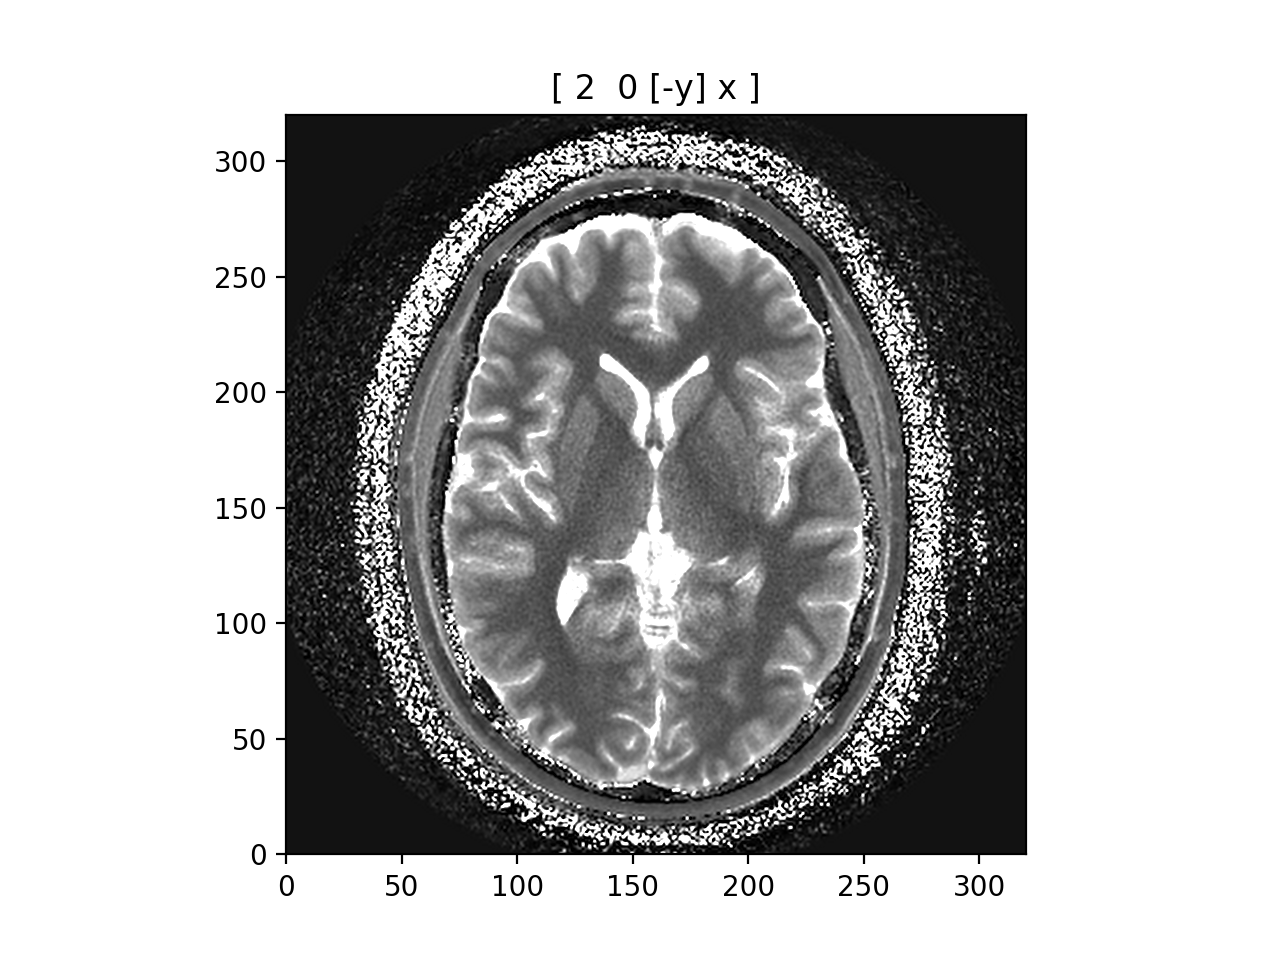

In [27]:
pl.ImagePlot(imm.cpu().numpy())

In [16]:
T1_pixel = np.load("DictionaryAndSequenceInfo/T1_pixel.npy")

In [24]:
T1 = T1w_fp_ep1.cpu().numpy()[0,0,:,:]

In [17]:
T1_pixel.shape

(320, 320)

<IPython.core.display.Javascript object>


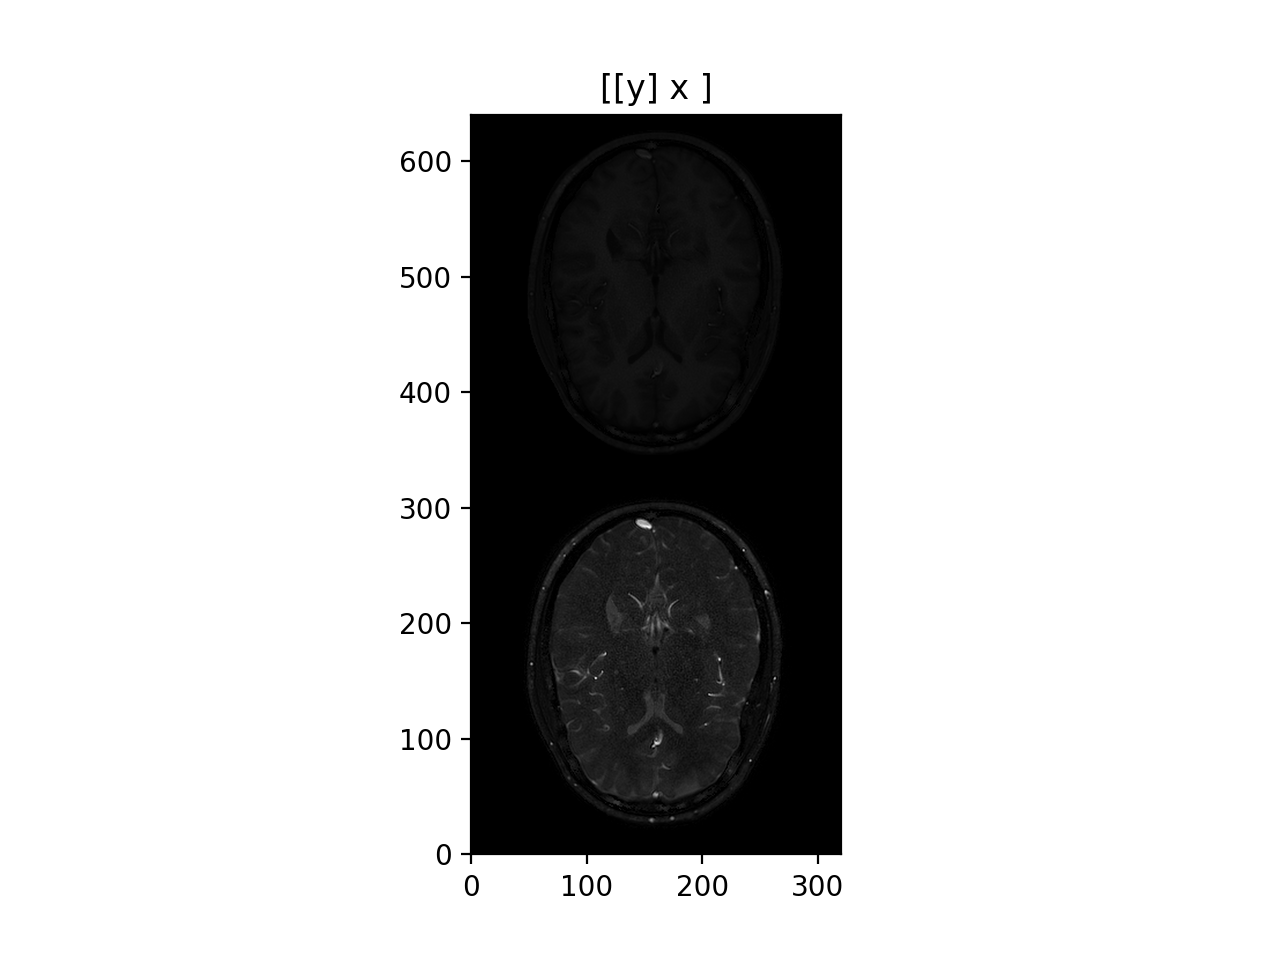

In [25]:
pl.ImagePlot(np.concatenate((T1,T1_pixel)))

<IPython.core.display.Javascript object>


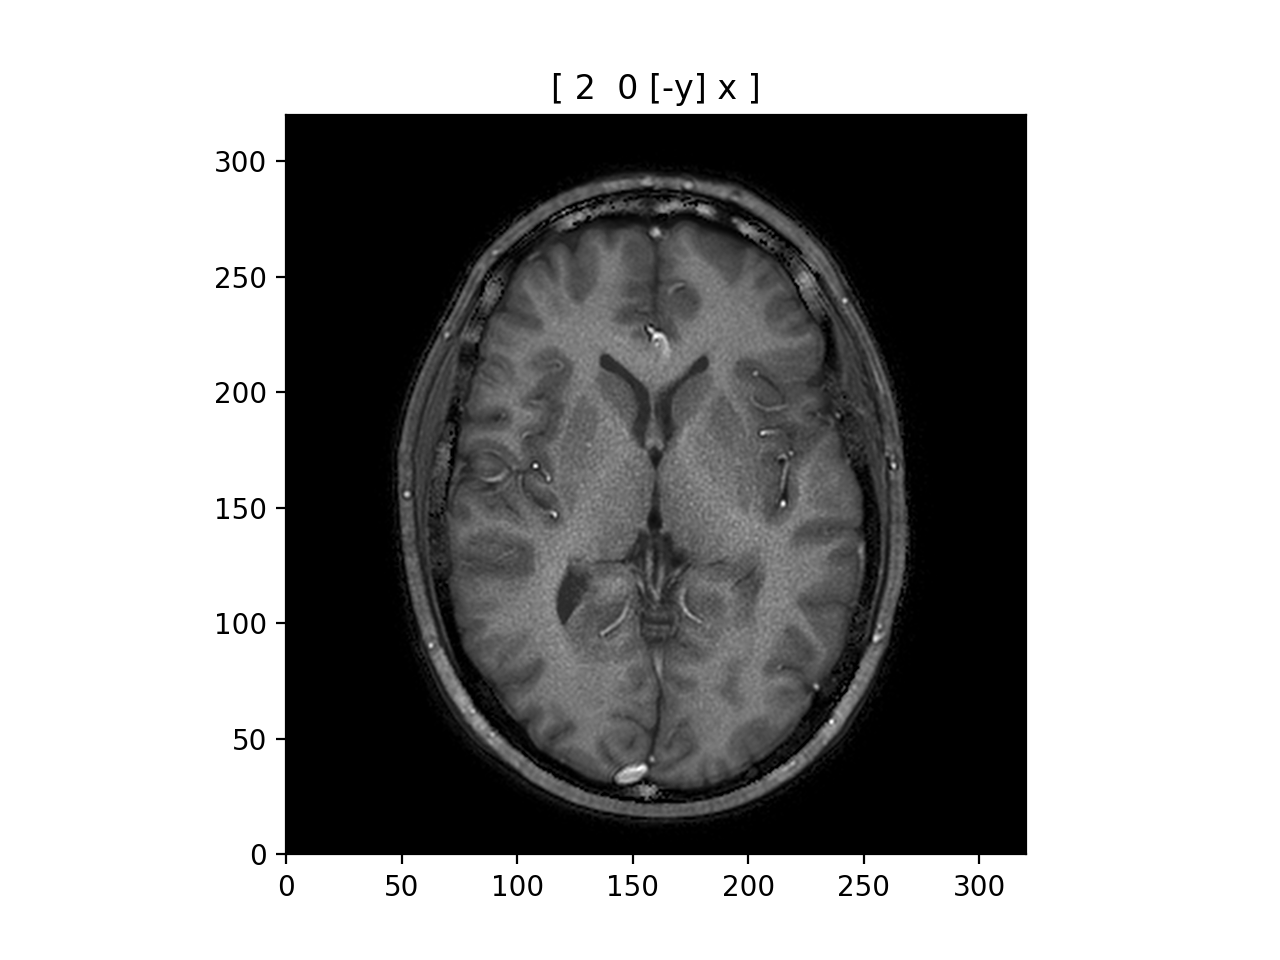

In [14]:
pl.ImagePlot(T1w_fp_ep1.cpu().numpy())

In [21]:
pd_mapping = np.load("DictionaryAndSequenceInfo/pd_mapping.npy")
mask = np.load("DictionaryAndSequenceInfo/T1_mask.npy")

In [9]:
imm.shape

torch.Size([4, 3, 320, 320])

In [17]:
imm_test

tensor([[[[ 0.7500]],

         [[ 0.0980]],

         [[26.6999]]],


        [[[ 0.7500]],

         [[ 0.0980]],

         [[26.6999]]],


        [[[ 0.7500]],

         [[ 0.0980]],

         [[26.6999]]],


        [[[ 0.7500]],

         [[ 0.0980]],

         [[26.6999]]]], device='cuda:0', dtype=torch.float64)

In [37]:
pl.ImagePlot(T1w_fp_epg.data.cpu().numpy().reshape(320,320)*pd_mapping*mask)

NameError: name 'T1w_fp_epg' is not defined

<IPython.core.display.Javascript object>


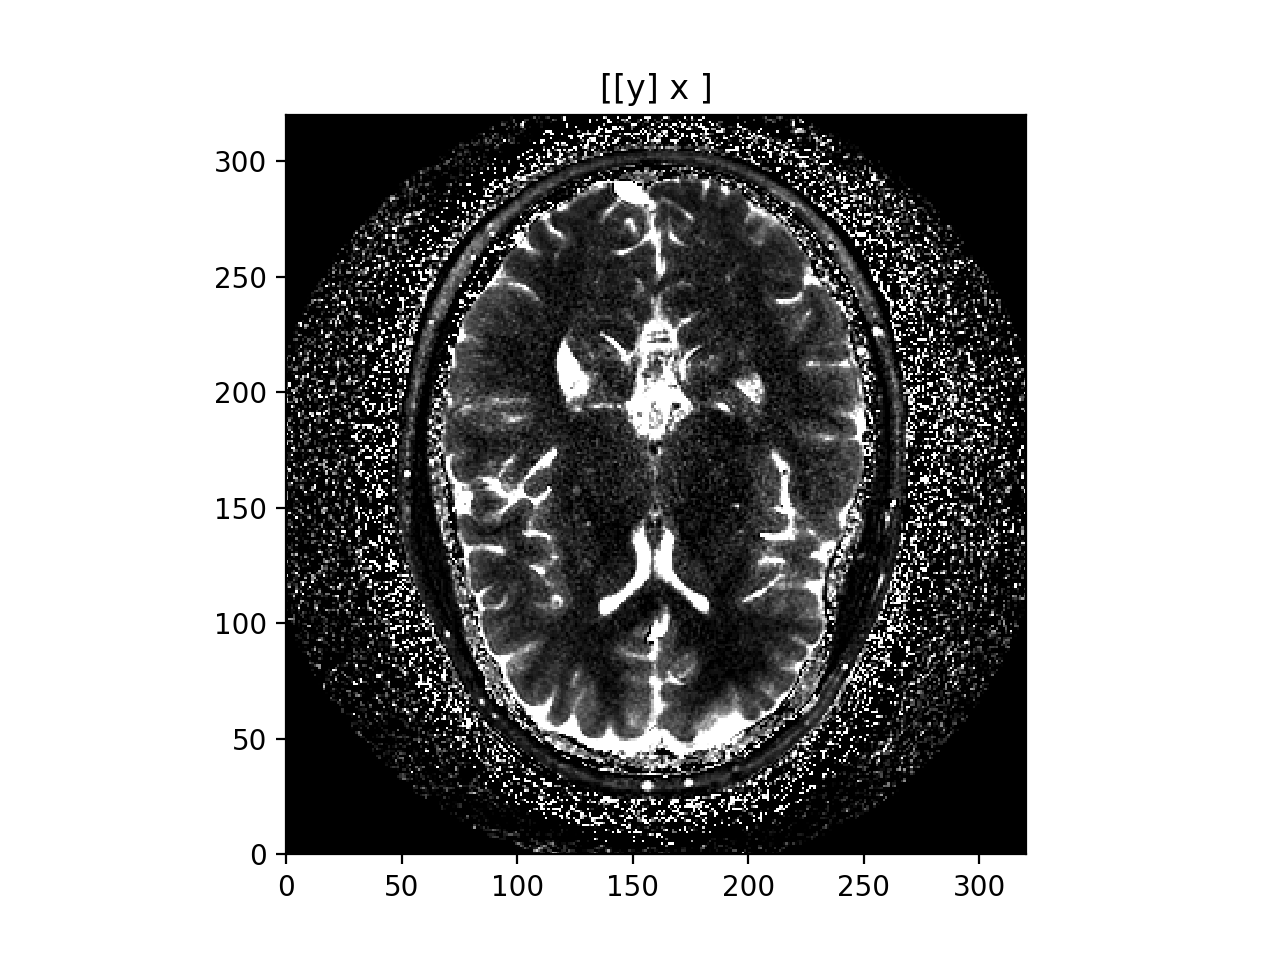

In [29]:
pl.Image(T2_mapping.cpu().numpy().reshape(320,320))

In [10]:
imm.shape

torch.Size([4, 3, 320, 320])

In [8]:
T1w_fp_epg = SE_sim(angle_ex_rad, angles_rad, TE, T1_mapping, T2_mapping, TR, B1=1.)[0]

NameError: name 'SE_sim' is not defined

In [23]:
T1w_fp_epg[T1w_fp_epg>5] = 0

In [435]:
T1w_fp_epg.numpy().max()

0.0

In [427]:
T1_mapping.max()

tensor(2960., dtype=torch.float64)

In [420]:
pl.Image(T1w_fp_epg)

AttributeError: 'Tensor' object has no attribute 'ndim'

In [276]:
T1_mapping.view(-1).shape[0]

102400

In [246]:
T1_mapping.shape

torch.Size([320, 320])